In [8]:
import requests
import pandas as pd

recipes_id = []
recipes_title = []
recipes_url = []
recipes_minutes = []
recipes_ingredients_id = []
recipes_ingredients_name = []
cuisines = []
dairyFree = []
glutenFree = []
lowFodmap = []
vegan = []
vegetarian = []
dishTypes = []
prices = []

for i in range(75): #maximum number of calls
    response = requests.get("https://api.spoonacular.com/recipes/random?apiKey=233fe043f15d4a39921d2ab6af2a651d&number=100")
    response = response.json()
    
    for recipe in response["recipes"]:
        # only adding unique recipes
        if recipe["id"] not in recipes_id:
            recipes_id.append(recipe["id"])
            recipes_title.append(recipe["title"])
            recipes_url.append(recipe["spoonacularSourceUrl"])
            recipes_minutes.append(recipe["readyInMinutes"])
            
            cuisines.append(recipe["cuisines"])
            dairyFree.append(recipe["dairyFree"])
            glutenFree.append(recipe["glutenFree"])
            lowFodmap.append(recipe["lowFodmap"])
            vegan.append(recipe["vegan"])
            vegetarian.append(recipe["vegetarian"])
            dishTypes.append(recipe["dishTypes"])
            prices.append(recipe["pricePerServing"])
            
            ingredients_name = []
            ingredients_id = []
            for ingredient in recipe["extendedIngredients"]:
                ingredients_name.append(ingredient["name"])
                ingredients_id.append(ingredient["id"])
            recipes_ingredients_name.append(ingredients_name)
            recipes_ingredients_id.append(ingredients_id)

In [9]:
# creating dataframe
df = pd.DataFrame({"id":recipes_id, "title": recipes_title, "url": recipes_url, "minutes":recipes_minutes, 
                   "ingredients_ids": recipes_ingredients_id, "ingredients_names": recipes_ingredients_name,
                  "cuisines": cuisines, "dairyFree":dairyFree, "glutenFree":glutenFree, "lowFodmap":lowFodmap,
                   "vegan": vegan, "vegetarian":vegetarian, "dishTypes":dishTypes, "price":prices})

In [10]:
df.head()

,id,title,url,minutes,ingredients_ids,ingredients_names,cuisines,dairyFree,glutenFree,lowFodmap,vegan,vegetarian,dishTypes,price
0,639512,Citrus Arugula Salad with Seared Scallops,https://spoonacular.com/citrus-arugula-salad-w...,45,"[11959, 9200, 11429, 10011205, 11291, 2047, 10...","[arugula, orange, radish, persian cucumber, gr...",[],True,True,False,False,False,"[side dish, salad]",145.19
1,638071,Chicken En Papillote With Basil and Cherry Tom...,https://spoonacular.com/chicken-en-papillote-w...,45,"[1055062, 1102047, 4053, 11282, 11215, 14106, ...","[skinless boneless chicken breast, salt and pe...",[],True,True,False,False,False,[],262.25
2,716195,Spicy Indian-Style Hummus,https://spoonacular.com/spicy-indian-style-hum...,45,"[1032035, 2031, 16056, 11156, 11216, 11297, 11...","[asafetida, cayenne, dried chickpeas, fresh ch...",[Middle Eastern],True,True,False,True,True,[side dish],43.68
3,664708,Vegetarian Spring Rolls With Garlic Lime Sauce,https://spoonacular.com/vegetarian-spring-roll...,45,"[11250, 11124, 11216, 6175, 6175, 11603, 9159,...","[butter leaf lettuce, carrots, ginger, hoisin ...","[Vietnamese, Asian]",True,True,True,False,False,[side dish],85.99
4,638808,Chocolate Almond Bark,https://spoonacular.com/chocolate-almond-bark-...,45,"[12061, 2031, 10019904, 1012047, 6971]","[almonds, cayenne pepper, dark chocolate candy...",[],True,True,False,False,False,[side dish],95.45


In [11]:
df.to_csv("new_perfect_recipes.csv")

In [12]:
len(df)

952

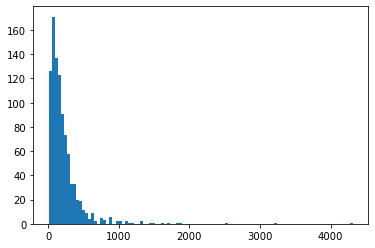

In [15]:
import matplotlib.pyplot as plt
plt.hist(prices, bins = 100);